In [590]:
import pandas as pd
import seaborn as sns

In [591]:
df = pd.read_csv('prixVoitures.csv')

In [592]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [593]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

## encodage de Fuel_type

In [594]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [595]:
df["Fuel_Type_encod"] = df["Fuel_Type"].replace({'Petrol':0, 'Diesel':1, 'CNG':2})

## encodage de Seller_Type

In [596]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [597]:
df["Seller_Type_encod"] = df["Seller_Type"].replace({'Dealer':0, 'Individual':1})

## encodage de Transmission

In [598]:
df["Transmission"].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [599]:
df["Transmission_encod"] = df["Transmission"].replace({'Manual':0, 'Automatic':1})

In [600]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Fuel_Type_encod,Seller_Type_encod,Transmission_encod
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,1,0,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,1,0,0


## Créer Dataset avec les Données numériques

In [601]:
x = df[['Present_Price','Fuel_Type_encod','Seller_Type_encod','Transmission_encod']]
#x = df[['Year','Present_Price','Kms_Driven','Owner','Fuel_Type_encod','Seller_Type_encod','Transmission_encod']]

In [602]:
y= df[['Selling_Price']]

In [603]:
data = df[['Year','Selling_Price','Present_Price','Kms_Driven','Owner','Fuel_Type_encod','Seller_Type_encod','Transmission_encod']]

## corrélation

In [604]:
cor = data.corr()

## Afficher les corrélation par heatmap heatmap(corr,vmax=1,annot=True)

<AxesSubplot:>

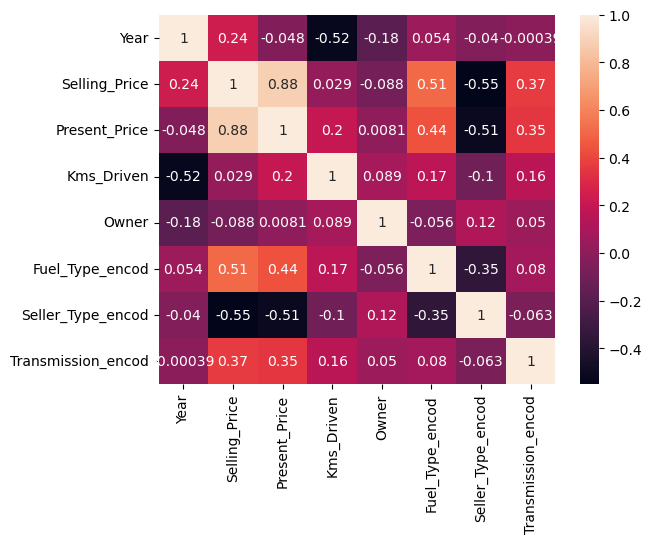

In [605]:
sns.heatmap(cor ,vmax=1 , annot=True)

## Afficher les distribution par pairplot

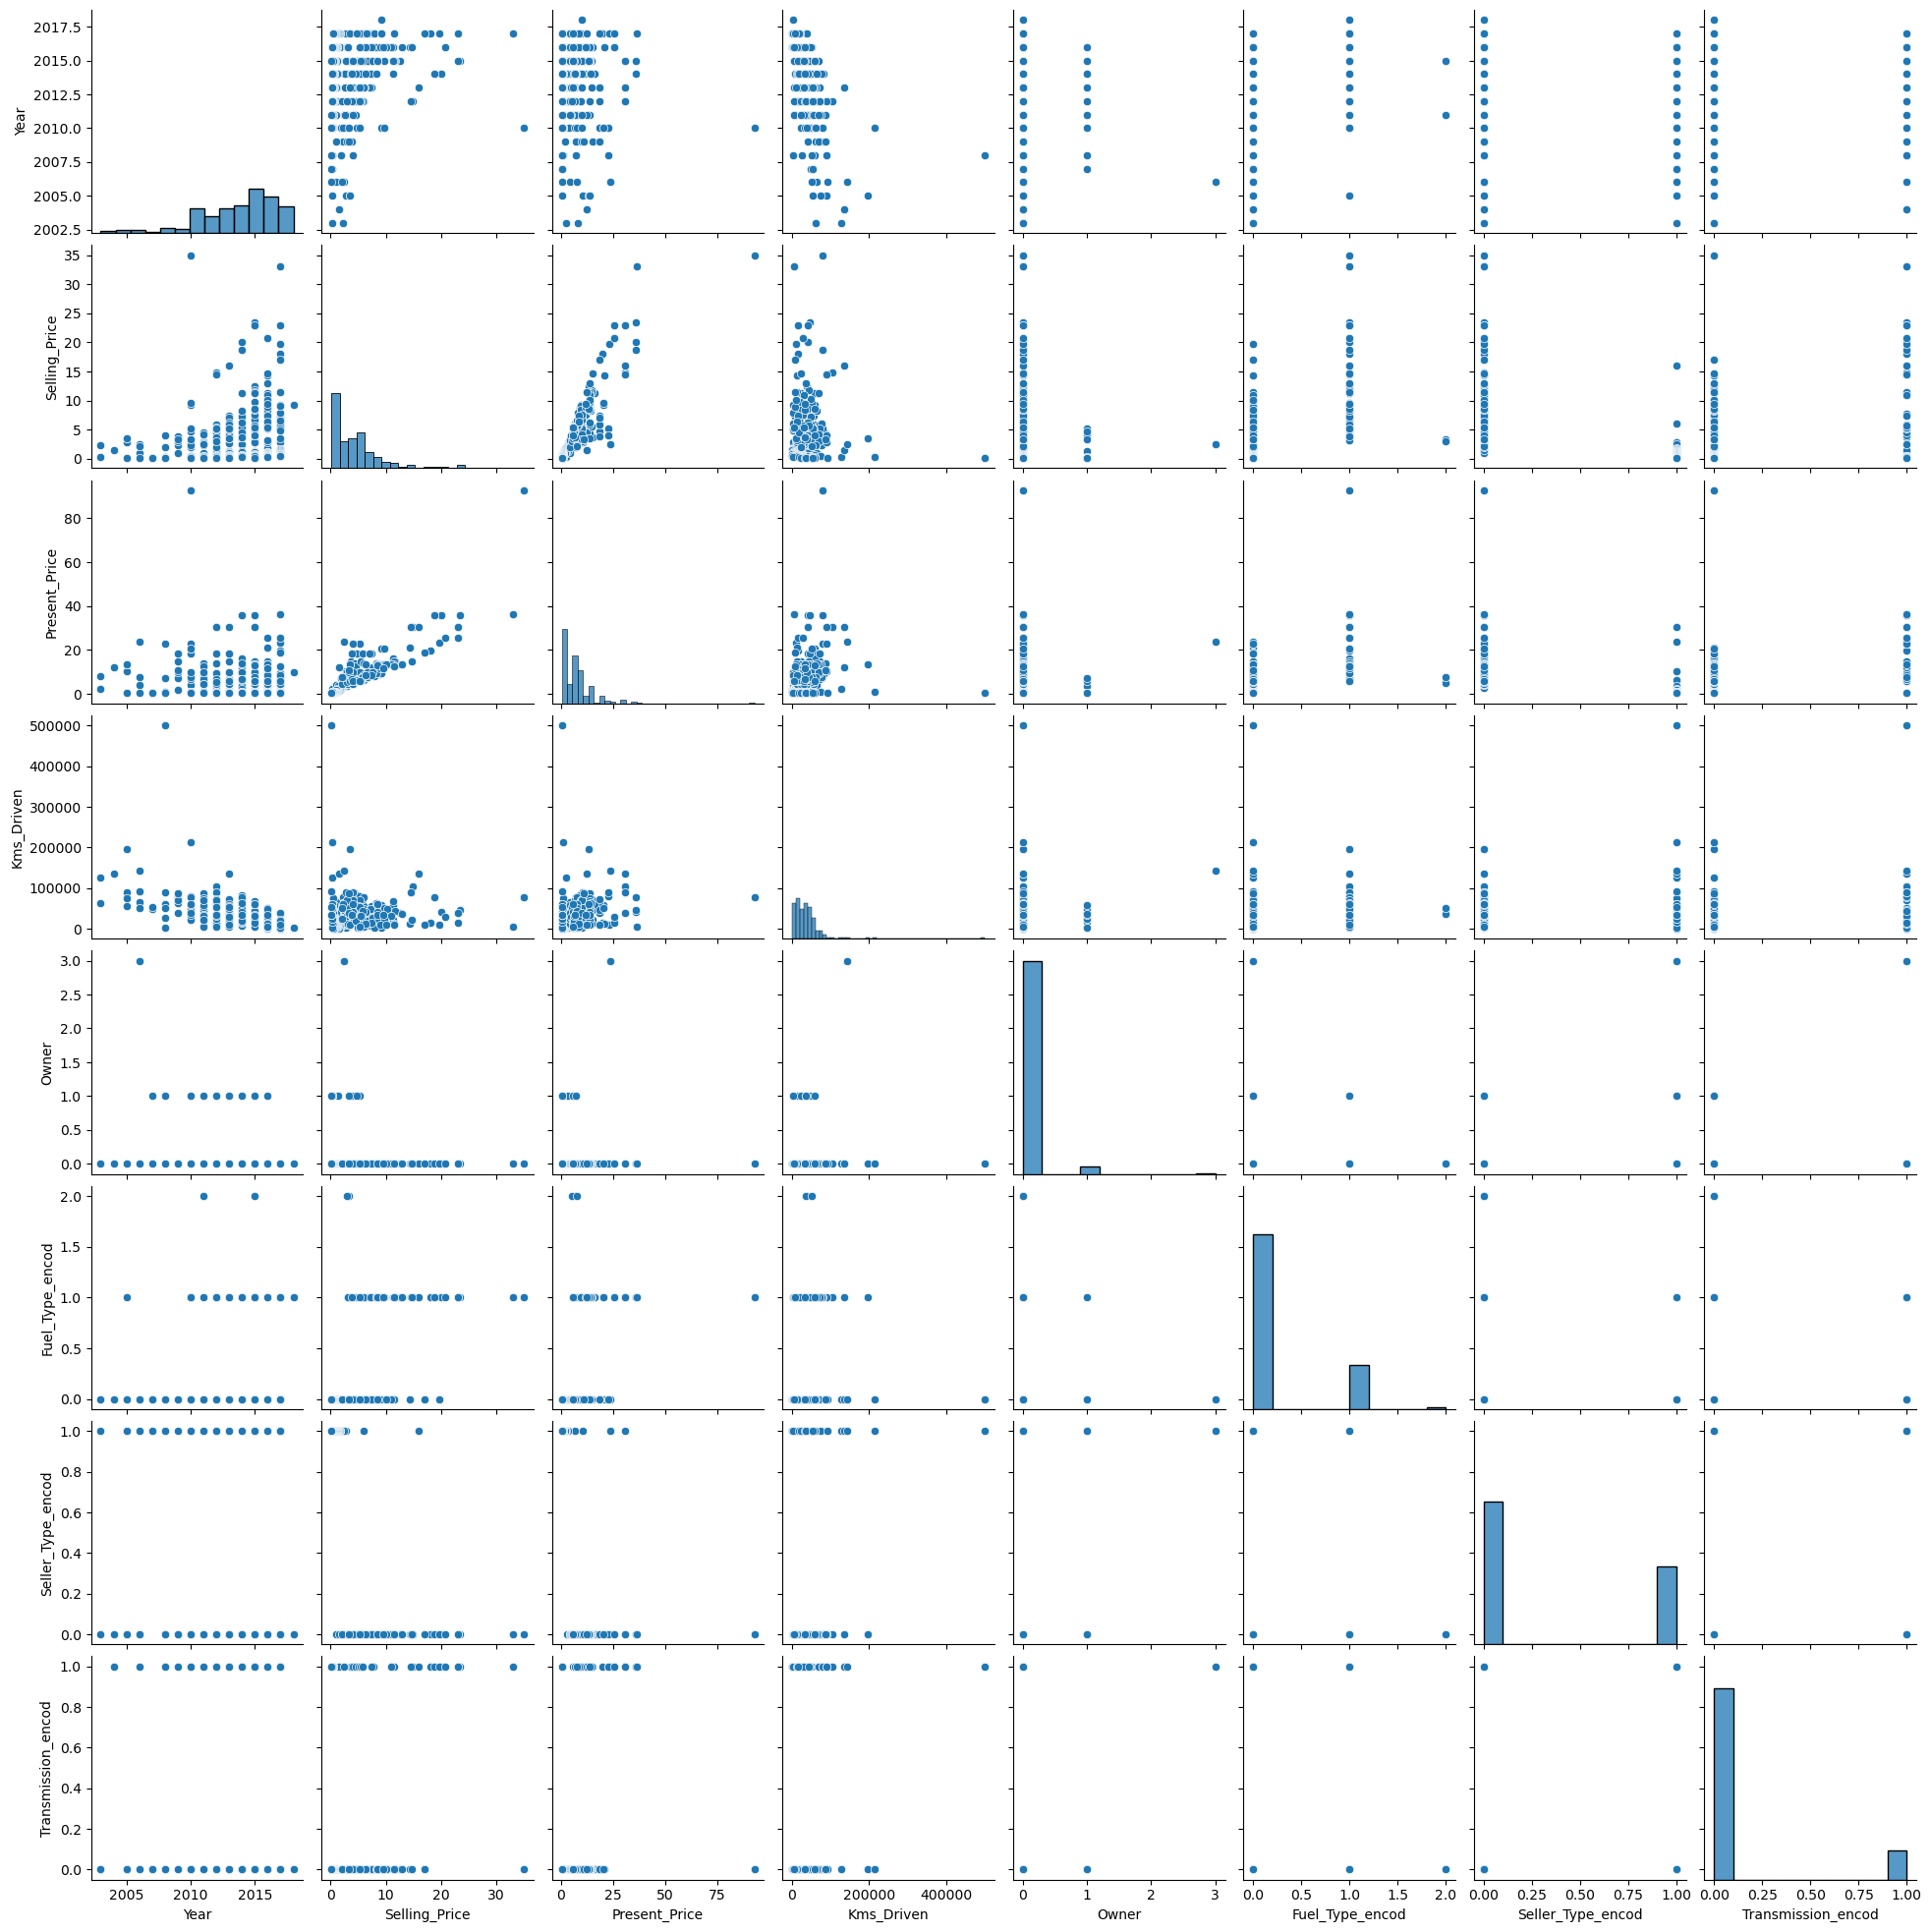

In [606]:
sns.pairplot(data)

## Créer X et y (Selling_Price)

# répartition des données x_train,x_test,y_train,y_test

In [607]:
from sklearn.model_selection import train_test_split

In [608]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

## Standarisation des données

In [609]:
from sklearn.preprocessing  import StandardScaler

In [610]:
scaler = StandardScaler()
x_train_scal = scaler.fit_transform(x_train)
x_test_scal  =scaler.fit_transform(x_test)
y_train_scal = scaler.fit_transform(y_train)
y_test_scal = scaler.fit_transform(y_test)

# Training avec LinearRegression

In [611]:
from sklearn.linear_model import LinearRegression

In [612]:
lr = LinearRegression()

In [613]:
lr.fit(x_train_scal , y_train_scal)

LinearRegression()

# Evaluation du modèle

In [614]:
lr.score(x_test_scal , y_test_scal)

0.8895117296901508

## Paramètres du modèle

In [615]:
lr.intercept_ , lr.coef_

(array([-5.16756025e-15]),
 array([[ 0.24515246,  0.81700764,  0.07240822, -0.08125864, -0.04217702,
          0.04952928]]))

# Training avec Stochastic Gradient Descent

In [616]:
from sklearn.linear_model import SGDRegressor

In [617]:
sgd = SGDRegressor(n_iter_no_change=80  , eta0=0.1)


In [618]:
sgd.fit(x_train_scal , y_train_scal.ravel())

SGDRegressor(eta0=0.1, n_iter_no_change=80)

## Paramètres du modèle

In [619]:
sgd.intercept_ , sgd.coef_

(array([0.00217482]),
 array([ 0.24735214,  0.84778602,  0.09008123, -0.07015028, -0.07153026,
         0.0697694 ]))

# Evaluation du modèle

In [620]:
sgd.score(x_test_scal  , y_test_scal)

0.9009451022758403